In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tqdm import tqdm

In [2]:
class_names = os.listdir('../input/flowers-recognition/flowers')
class_dict = {class_name: i for i, class_name in enumerate(class_names)}
print(f"Class names: {class_dict}")

Class names: {'dandelion': 0, 'daisy': 1, 'sunflower': 2, 'tulip': 3, 'rose': 4}


In [3]:
def load_data():
    dataset = '../input/flowers-recognition/flowers'
    dataset_content = os.listdir(dataset)
    output = []
    labels = []
    images = []
    print(dataset_content)
    for class_name in dataset_content:
        label = class_dict[class_name]
        print(label)
        for file in tqdm(os.listdir(os.path.join(dataset, class_name))):
            img_path = os.path.join(os.path.join(dataset, class_name), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (200, 200))
            
            images.append(image)
            labels.append(label)
        print(f"Label shape {len(labels)} : Image shape {len(images)}")
        #print(len(images), len(labels))
    images = np.array(images, dtype='float32') / 255.0
    labels = np.array(labels, dtype='int32')
    output.append((images, labels))
    return output

In [4]:
data = load_data()

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
0


100%|██████████| 1052/1052 [00:10<00:00, 98.57it/s]


Label shape 1052 : Image shape 1052
1


100%|██████████| 764/764 [00:06<00:00, 109.98it/s]


Label shape 1816 : Image shape 1816
2


100%|██████████| 733/733 [00:07<00:00, 98.61it/s]


Label shape 2549 : Image shape 2549
3


100%|██████████| 984/984 [00:09<00:00, 99.51it/s]


Label shape 3533 : Image shape 3533
4


100%|██████████| 784/784 [00:07<00:00, 106.00it/s]


Label shape 4317 : Image shape 4317


In [5]:
x, y = data[0]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

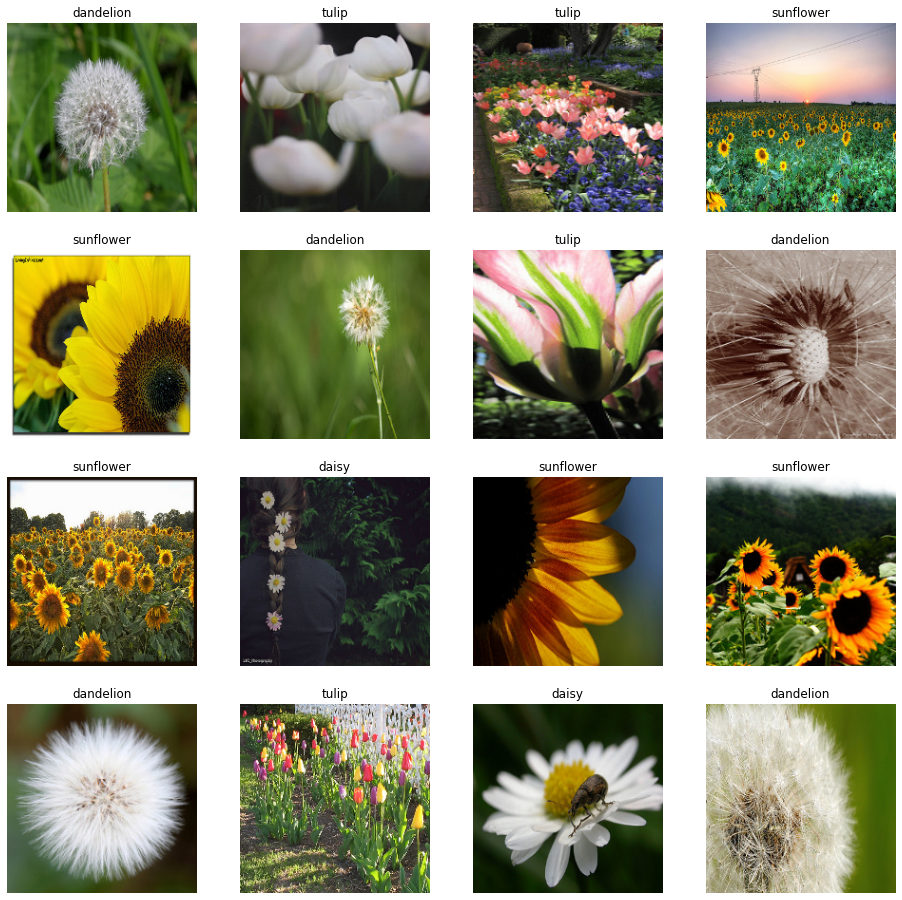

In [7]:
samples = 16
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
for sample in range(samples):
    plt.subplot(4, 4, sample+1)
    plt.imshow(x_train[sample])
    plt.title(class_names[y_train[sample]])
    plt.axis('off')

In [8]:
print(f'x_train shape {x_train.shape}, x_test shape{x_test.shape}') 

x_train shape (3453, 200, 200, 3), x_test shape(864, 200, 200, 3)


In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=42)

In [10]:
from tensorflow.keras import callbacks
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr*0.99
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

In [11]:
# # modelling starts using a CNN.

model = keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same',activation='relu', input_shape=(200,200,3), kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding ='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), padding = 'same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

2022-01-09 15:03:17.114575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 15:03:17.224559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 15:03:17.225647: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-09 15:03:17.227320: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [12]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']    
)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=100, verbose=2, callbacks=[lr_scheduler])

2022-01-09 15:03:20.511395: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1325760000 exceeds 10% of free system memory.
2022-01-09 15:03:21.984066: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1325760000 exceeds 10% of free system memory.
2022-01-09 15:03:22.964811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-01-09 15:03:24.617124: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


87/87 - 11s - loss: 6.6993 - accuracy: 0.3125 - val_loss: 1.6848 - val_accuracy: 0.3849
Epoch 2/100
87/87 - 2s - loss: 1.5884 - accuracy: 0.3508 - val_loss: 1.5092 - val_accuracy: 0.3907
Epoch 3/100
87/87 - 2s - loss: 1.4401 - accuracy: 0.3874 - val_loss: 1.2962 - val_accuracy: 0.4732
Epoch 4/100
87/87 - 2s - loss: 1.2958 - accuracy: 0.4830 - val_loss: 1.2469 - val_accuracy: 0.5152
Epoch 5/100
87/87 - 2s - loss: 1.2454 - accuracy: 0.5022 - val_loss: 1.2120 - val_accuracy: 0.5326
Epoch 6/100
87/87 - 2s - loss: 1.2167 - accuracy: 0.5217 - val_loss: 1.2098 - val_accuracy: 0.5123
Epoch 7/100
87/87 - 2s - loss: 1.1848 - accuracy: 0.5482 - val_loss: 1.1561 - val_accuracy: 0.5253
Epoch 8/100
87/87 - 2s - loss: 1.1789 - accuracy: 0.5366 - val_loss: 1.1590 - val_accuracy: 0.5485
Epoch 9/100
87/87 - 2s - loss: 1.1479 - accuracy: 0.5550 - val_loss: 1.1912 - val_accuracy: 0.5123
Epoch 10/100
87/87 - 2s - loss: 1.1556 - accuracy: 0.5492 - val_loss: 1.1949 - val_accuracy: 0.5441
Epoch 11/100
87/87 -

In [14]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

27/27 - 0s - loss: 2.6594 - accuracy: 0.5532


[2.6594059467315674, 0.5532407164573669]